Import Necessary Libraries

In [20]:
import pandas as pd
import re 
import os


# List of CSV file paths

In [21]:
folder_name = 'data/cleaned'
filenames = [f'property_assessment_{year}.csv' for year in range(2009, 2025) if year != 2014]
file_paths = [os.path.join(folder_name, filename) for filename in filenames]
dataframes = []  # This list will store each DataFrame

# Function to extract year from filename

In [22]:
def extract_year_from_filename(filename):
    match = re.search(r'\d{4}', filename)
    if match:
        return match.group()
    return None

# Read each CSV, add the "Year" column, and append to the list

In [23]:
year = extract_year_from_filename(file_paths[0])  # Extract year
df = pd.read_csv(file_paths[0], dtype={'zipcode': str})
if year:
    df['Year'] = year  # Add the "Year" column with the extracted year
print(df.head())

  zipcode  total_res_units  total_com_units  total_rc_units  Year
0   02108           1031.0            216.0             2.0  2009
1   02109           1199.0             84.0             8.0  2009
2   02110            872.0            273.0             0.0  2009
3   02111           1635.0            154.0           285.0  2009
4   02113           1132.0             38.0            28.0  2009


In [24]:
for file_path in file_paths:
    year = extract_year_from_filename(file_path)  # Extract year
    try:
        df = pd.read_csv(file_path, dtype={'zipcode': str, 'total_res_units': int, 'total_com_units': int, 'total_rc_units': int }, on_bad_lines='skip')
        if year:
            df['Year'] = year  # Add the "Year" column with the extracted year
        df['total_units'] = df['total_res_units'] + df['total_com_units'] + df['total_rc_units']
        dataframes.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df['zipcode'] = combined_df['zipcode'].astype(str).str.zfill(5)
print(combined_df.head())

  zipcode  total_res_units  total_com_units  total_rc_units  Year  total_units
0   02108             1031              216               2  2009         1249
1   02109             1199               84               8  2009         1291
2   02110              872              273               0  2009         1145
3   02111             1635              154             285  2009         2074
4   02113             1132               38              28  2009         1198


# Merge All DataFrames into One and Save the Merged DataFrame to a New CSV File

In [25]:
merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_csv('merged_data.csv', index=False)


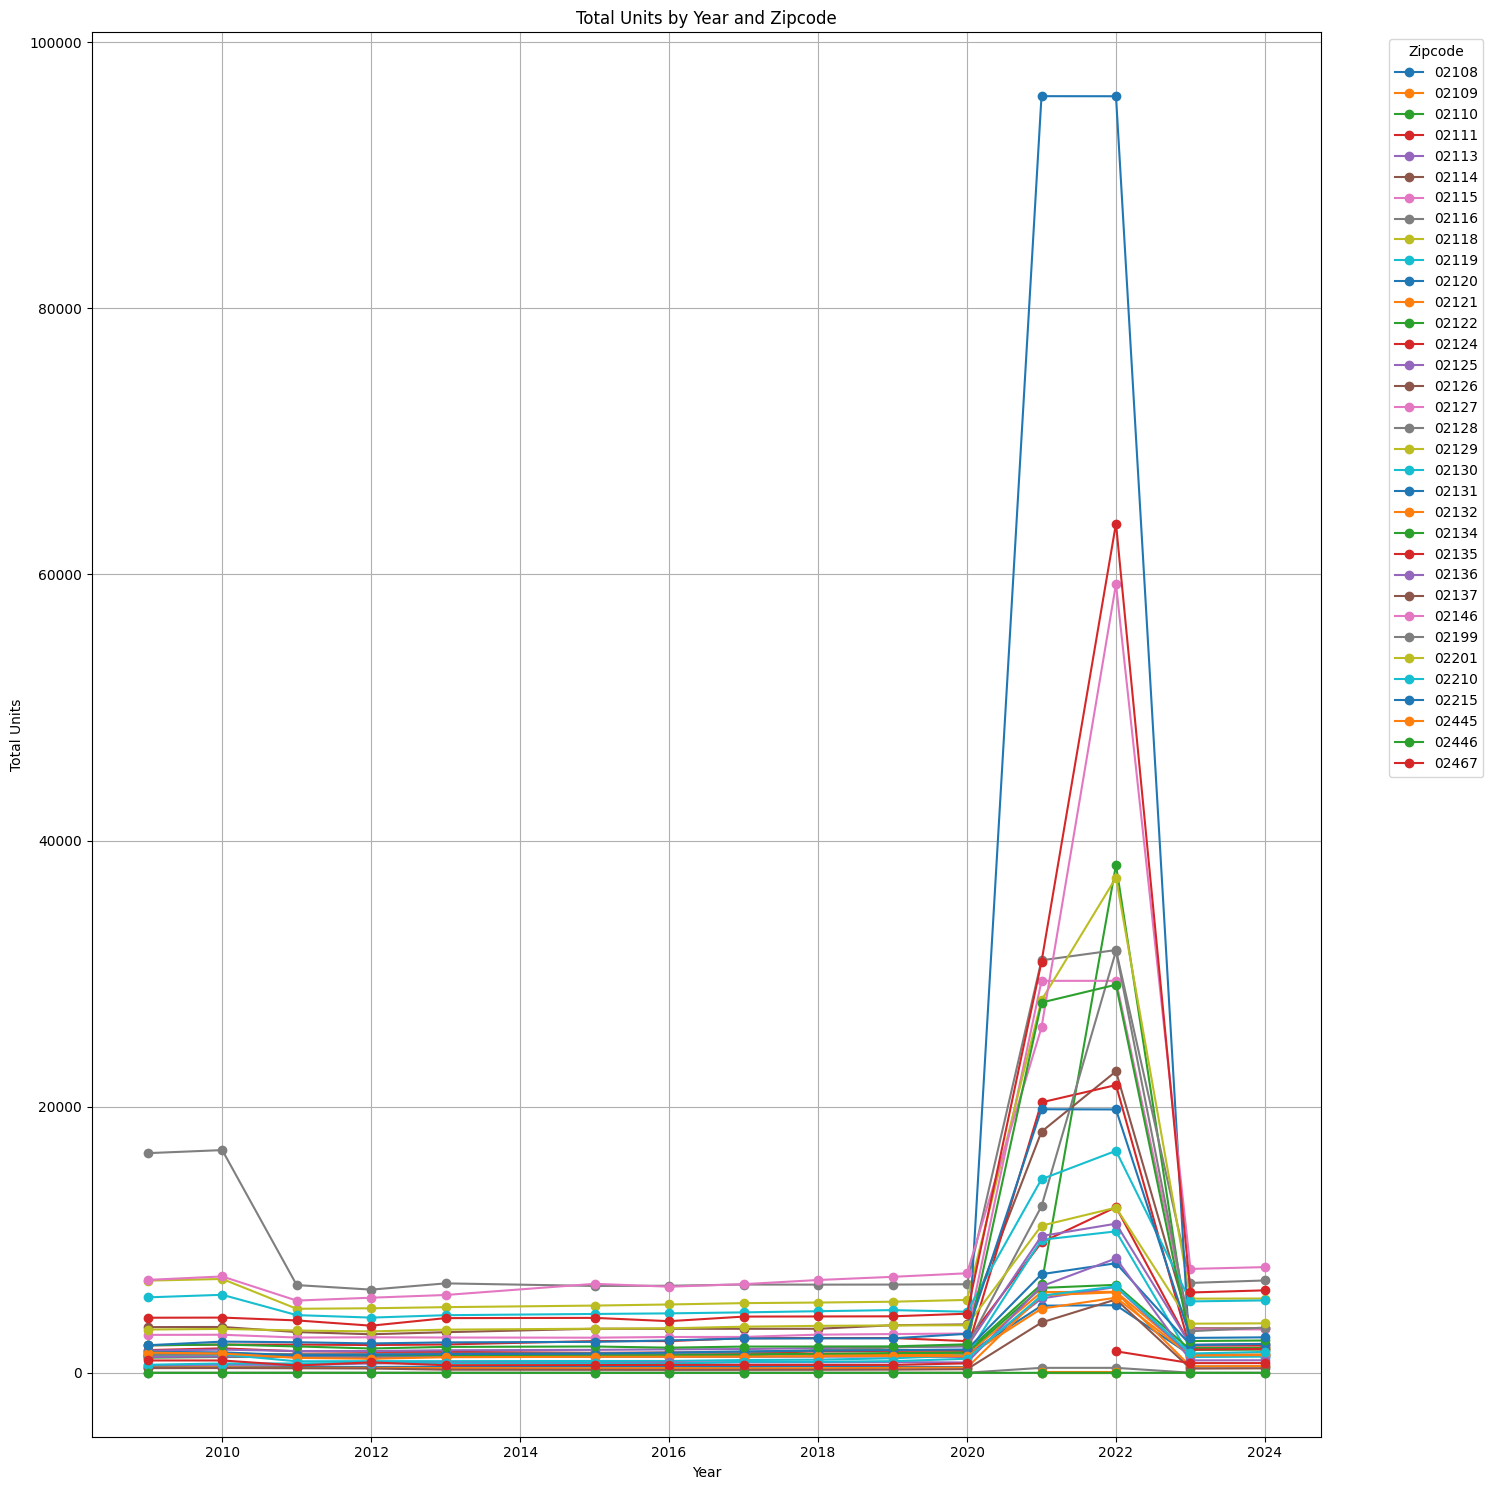

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'combined_df' is your DataFrame
# Ensure the 'Year' is of type int for proper sorting and plotting
combined_df['Year'] = combined_df['Year'].astype(int)

# Pivot the DataFrame
pivot_df = combined_df.pivot_table(index='Year', columns='zipcode', values='total_units', aggfunc='sum')

# Plot
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
pivot_df.plot(kind='line', ax=plt.gca(), marker='o')  # Added marker for visibility of data points
plt.title('Total Units by Year and Zipcode')
plt.xlabel('Year')
plt.ylabel('Total Units')
plt.grid(True)  # Add grid for better readability
plt.legend(title='Zipcode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend

# Show the plot
plt.show()

In [27]:
from scipy.stats import linregress
import numpy as np

trends = {}
years = pivot_df.index.values  # Get the years as your x-values

for zipcode in pivot_df.columns:
    # Use only non-NaN values for regression
    y_values = pivot_df[zipcode].values
    valid_indices = ~np.isnan(y_values)  # ~ is the negation operator
    slope, intercept, r_value, p_value, std_err = linregress(years[valid_indices], y_values[valid_indices])
    
    # Determine the trend based on the slope
    if slope > 0:
        trend = 'Increasing'
    elif slope < 0:
        trend = 'Decreasing'
    else:
        trend = 'Stable'
    
    trends[zipcode] = trend

# Print the trend for each zipcode
for zipcode, trend in trends.items():
    print(f"Zipcode {zipcode}: {trend}")

Zipcode 02108: Increasing
Zipcode 02109: Increasing
Zipcode 02110: Increasing
Zipcode 02111: Increasing
Zipcode 02113: Increasing
Zipcode 02114: Increasing
Zipcode 02115: Increasing
Zipcode 02116: Increasing
Zipcode 02118: Increasing
Zipcode 02119: Increasing
Zipcode 02120: Increasing
Zipcode 02121: Increasing
Zipcode 02122: Increasing
Zipcode 02124: Increasing
Zipcode 02125: Increasing
Zipcode 02126: Increasing
Zipcode 02127: Increasing
Zipcode 02128: Increasing
Zipcode 02129: Increasing
Zipcode 02130: Increasing
Zipcode 02131: Increasing
Zipcode 02132: Increasing
Zipcode 02134: Increasing
Zipcode 02135: Increasing
Zipcode 02136: Increasing
Zipcode 02137: Stable
Zipcode 02146: Stable
Zipcode 02199: Increasing
Zipcode 02201: Stable
Zipcode 02210: Increasing
Zipcode 02215: Increasing
Zipcode 02445: Stable
Zipcode 02446: Increasing
Zipcode 02467: Increasing


c:\Users\73907\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
c:\Users\73907\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\73907\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [29]:
# Assuming 'pivot_df' is your pivoted DataFrame
# Ensure the DataFrame is sorted by index (Year) if it's not already
pivot_df.sort_index(inplace=True)

# Get the first year in your DataFrame, which might not be 2009
# This step is just to ensure the code dynamically adapts to available data
first_year = pivot_df.index.min()

# Get the latest year in your DataFrame
latest_year = pivot_df.index.max()

# Calculate the difference in total units for each zipcode between the latest year and 2009
change_df = pivot_df.loc[latest_year] - pivot_df.loc[2009, :]

# Display the changes
print(f"Changes in Total Units from 2009 to {latest_year}:")
print(change_df)

Changes in Total Units from 2009 to 2024:
zipcode
02108     102.0
02109      93.0
02110     731.0
02111     -22.0
02113     109.0
02114     -92.0
02115     411.0
02116   -9566.0
02118   -1343.0
02119    -141.0
02120      13.0
02121     106.0
02122     353.0
02124      79.0
02125     511.0
02126     -15.0
02127     961.0
02128    2027.0
02129     466.0
02130    -230.0
02131     590.0
02132    -180.0
02134     360.0
02135    2058.0
02136     362.0
02137       NaN
02146       NaN
02199       0.0
02201       NaN
02210     967.0
02215     593.0
02445       NaN
02446       0.0
02467    -199.0
dtype: float64
